<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/ML_quest/main_quest_02/mq2_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Main Quest 02. 포켓몬 찾아 삼만리


### 학습 전제

* `numpy`, `pandas`를 활용해서 표 데이터를 다뤄본 적이 있고, 이에 대한 기본적인 활용을 할 수 있습니다.
* `pandas의 문법과 다양한 메서드`를 활용해 본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
* `matplotlib`을 활용해서 데이터 시각화를 해본 적이 있고, 코드를 보면 어느 정도 이해할 수 있습니다.
* 데이터셋을 `train/test 데이터셋`으로 나누어서 모델을 학습 및 검증해본 경험이 있습니다.

### 학습 목표

* 다양한 피처가 있는 데이터셋을 밑바닥부터 샅샅이 뜯어보고, 전설의 포켓몬을 분류하기 위한 피처에는 무엇이 있는지 생각해 봅시다.
* 모델 학습을 시작하기 전 모든 컬럼에 대해 `그래프 시각화`, `피벗 테이블` 등을 활용하며 다양한 방법으로 충분한 EDA를 진행합니다.
* 모델 학습에 넣기 위해서 전처리가 필요한 범주형/문자열 데이터에 대한 전처리를 `원-핫 인코딩` 등으로 적절하게 진행합니다.
* 전체 데이터셋을 `train/test 데이터셋`으로 나누고, 적절한 분류 모델(Decision Tree)을 선택해 학습시키며 베이스라인과 비교합니다.

### 목차

1. 포켓몬, 그 데이터는 어디서 구할까  
    (1) 안녕, 포켓몬과 인사해  
    (2) 포켓몬, 그 데이터는 어디서 구할까  
    (3) 포켓몬 데이터 불러오기  


2. 전설의 포켓몬? 먼저 샅샅이 살펴보자  
    (1) 결측치와 전체 칼럼  
    (2) ID와 이름  
    (3) 포켓몬의 속성  
    (4) 모든 스탯의 총합  
    (5) 세부 스탯  
    (6) 세대  


3. 전설의 포켓몬과 일반 포켓몬, 그 차이는?  
    (1) 전설의 포켓몬의 Total값  
    (2) 전설의 포켓몬의 이름  


4. 모델에 넣기 위해! 데이터 전처리하기  
    (1) 이름의 길이가 10 이상인가?  
    (2) 이름에 자주 쓰이는 토큰 추출  
    (3) Type 1 & 2! 범주형 데이터 전처리하기  


5. 가랏, 몬스터볼  
    (1) 가장 기본 데이터로 만드는 베이스라인  
    (2) 의사 결정 트리 모델 학습시키기  
    (3) 피처 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?  
    (4) 의사 결정 트리 모델 다시 학습시키기  

### 1-2. 안녕, 포켓몬과 인사해

전설의 포켓몬 구별하기, 탐색적 데이터 분석 Exploratory Data Analysis, EDA

### 1-3. 포켓몬, 그 데이터는 어디에서 구할까?

In [ ]:
# Prep Dataset in cloud shell
# mkdir -p ~/aiffel/pokemon_eda/data
# ln -s ~/data/* ~/aiffel/pokemon_eda/data

### 1-4. 포켓몬 데이터 불러오기

**라이브러리 가져오기**

In [ ]:
# Lib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


**데이터셋을 pandas로 불러오기**

In [ ]:
# Dataset
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [ ]:
# Copy original_data to pokemon
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


이 중 우리가 타겟으로 두고 확인할 데이터는 `Legendary (전설의 포켓몬인지 아닌지의 여부)`이므로,  
* `Legendary == True` 값을 가지는 레전드 포켓몬 데이터셋은 `legendary` 변수에 저장  
* `Legendary == False` 값을 가지는 일반 포켓몬 데이터셋은 `ordinary` 변수에 저장  

In [ ]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


**Q. 일반 포켓몬의 데이터셋도 만들어봅시다.**

In [ ]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 1-5. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (1) 결측치와 전체 칼럼

**빈 데이터 확인하기**

In [ ]:
# 결측치(Null) 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

**전체 컬럼 이해하기**

In [ ]:
# 데이터셋의 전체 컬럼 출력, 800개의 데이터와 13개의 컬럼으로 구성
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

각 컬럼이 나타내는 바와 데이터 타입은 다음과 같습니다.  

* `#` : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. `int`
* Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. `(unique) str`
* Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. `str`
* Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. `str`
* Total : 전체 6가지 스탯의 총합. `int`
* HP : 포켓몬의 체력. `int`
* Attack : 물리 공격력. (scratch, punch 등) `int`
* Defense : 물리 공격에 대한 방어력. `int`
* Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) `int`
* Sp. Def : 특수 공격에 대한 방어력. `int`
* Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) `int`
* Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. `int`
* Legendary : 전설의 포켓몬 여부. **(target feature)** `bool`

### 1-6. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (2) ID와 이름

**`#` : ID number**

In [ ]:
# "#" 컬럽 값의 종류 확인
len(set(pokemon["#"]))

721

집합의 크기가 800이 아니라 721이므로, `#` 컬럼의 값은 unique하지 않으며(즉, index로 쓸 수 없으며), 같은 번호를 가지는 컬럼들이 있음.

In [ ]:
# "#" 컬럼 값을 가지는 포켓몬 확인
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


예를 들어, `#6` 의 포켓몬은 `Charizard`, `CharizardMega Charizard X`, `CharizardMega Charizard Y` 세 개로 나뉨.  
기본 포켓몬인 Charizard(리자몽)로부터 시작해서 진화한 CharizardMega Charizard가 있고, X, Y는 버전을 나타냄.

**`Name` : 이름**

 **Q. 총 몇 종류의 포켓몬 이름이 있는지 확인해봅시다**

In [ ]:
# 포켓몬 이름 확인
len(set(pokemon["Name"]))

800

이름(`Name`) 은 데이터셋 전체 값과 같이 800, 모든 이름은 *unique*.

### 1-7. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (3) 포켓몬의 속성

**`Type 1` & `Type 2` : 포켓몬의 속성**

In [ ]:
# 무작위로 두 마리의 포켓몬 살펴보기
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


포켓몬이 가지는 속성은 기본적으로 하나, 또는 최대 두 개까지 가질 수 있는 것을 알 수 있음.  
특히, 데이터셋에서 한 개의 속성을 가지는 포켓몬은 `Type 1`에만 속성이 표시되고 Type 2에는 `NaN`이 표시됨.

In [ ]:
# 각 속성의 종류 살펴보기
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

`Type 1`에는 총 18가지, `Type 2`에는 총 19가지의 속성이 있음.

In [ ]:
# Type 1과 Type 2 속성을 집합으로 만들어서 차집합 확인하기
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

NaN 데이터 외의 나머지 18가지 속성은 `Type 1`, `Type 2` 모두 같은 세트의 데이터가 들어가 있음.

In [ ]:
# 포켓몬들의 모든 Type을 types 변수에 저장하기
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fighting', 'Bug', 'Fire', 'Rock', 'Psychic', 'Normal', 'Ice', 'Dragon', 'Poison', 'Ground', 'Ghost', 'Electric', 'Dark', 'Steel', 'Flying', 'Fairy', 'Grass', 'Water']


In [ ]:
# Type 2가 NaN인 포켓몬의 수
pokemon["Type 2"].isna().sum()

386

**`Type 1` 데이터 분포 plot**

일반 포켓몬보다 전설의 포켓몬 수가 매우 적은 불균형 데이터이므로, 전설의 포켓몬은 따로 시각화해야 함.  
`plt`의 `subplot`을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 `sns(seaborn)`의 `countplot`(데이터의 개수를 표시하는 플롯)을 활용.

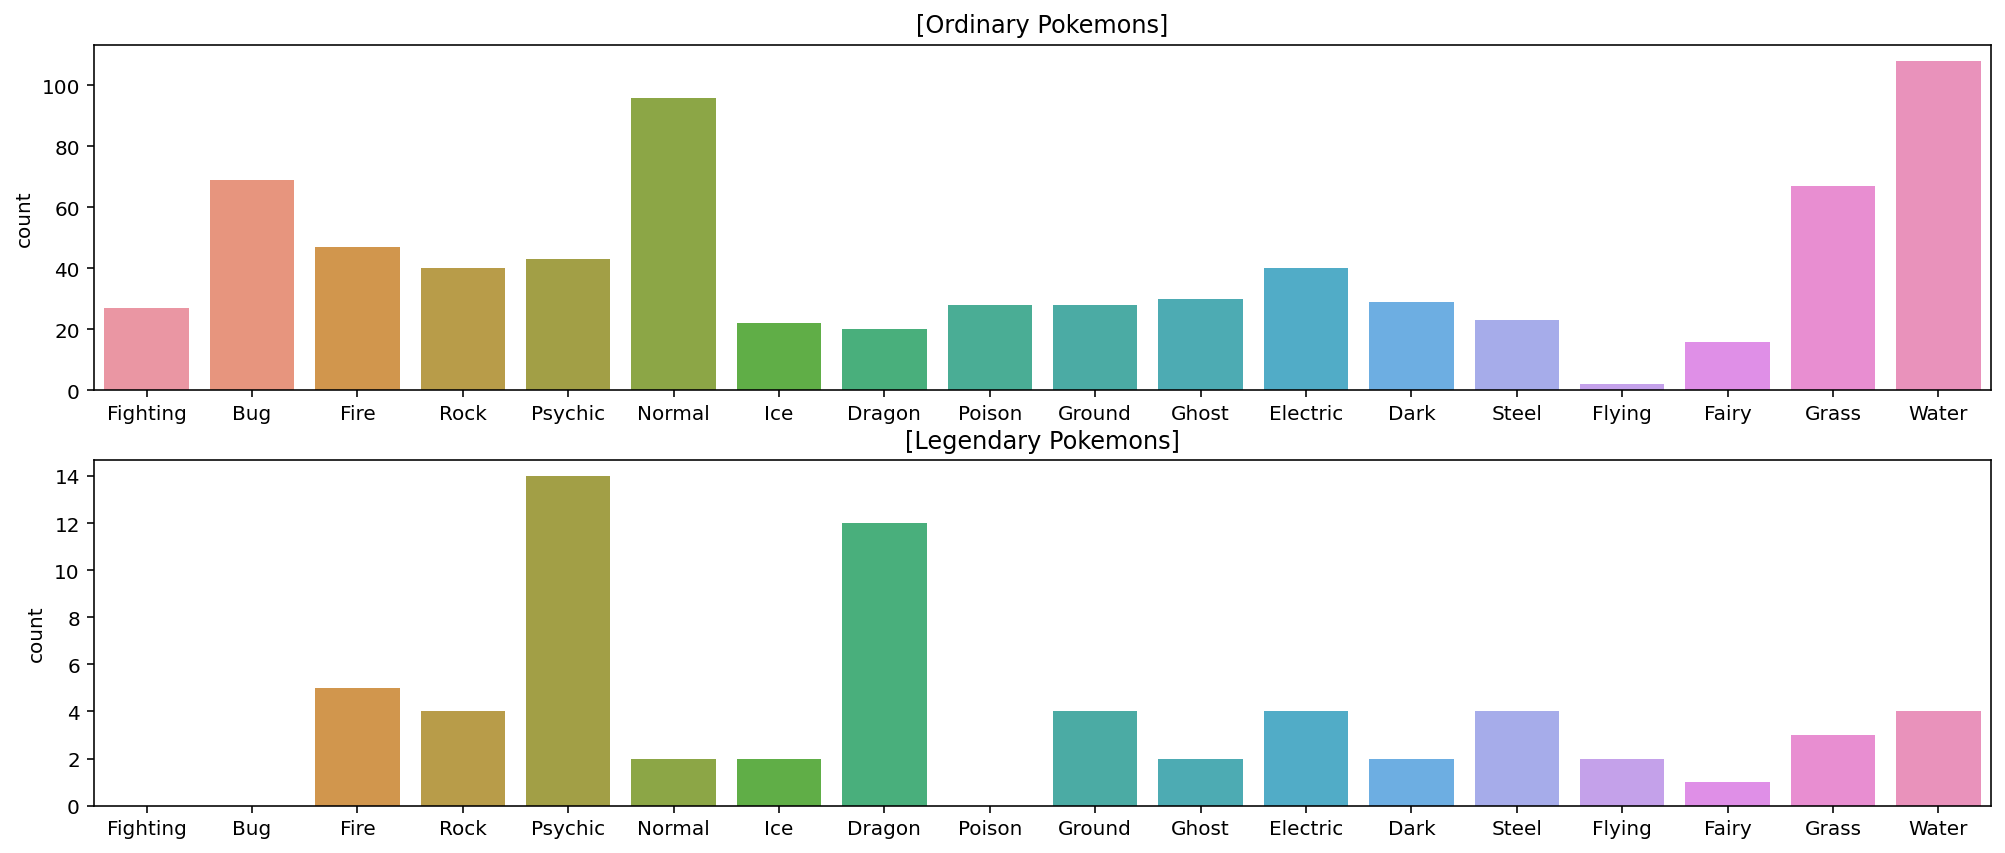

In [ ]:
# 일반 포켓몬과 전설의 포켓몬 Type 1 데이터 분포 확인
plt.figure(figsize=(17, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [ ]:
# Type1 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


**`Type 2` 데이터 분포 plot**

**Q. 일반 포켓몬과 전설의 포켓몬 Type 2 데이터 분포 확인하기**

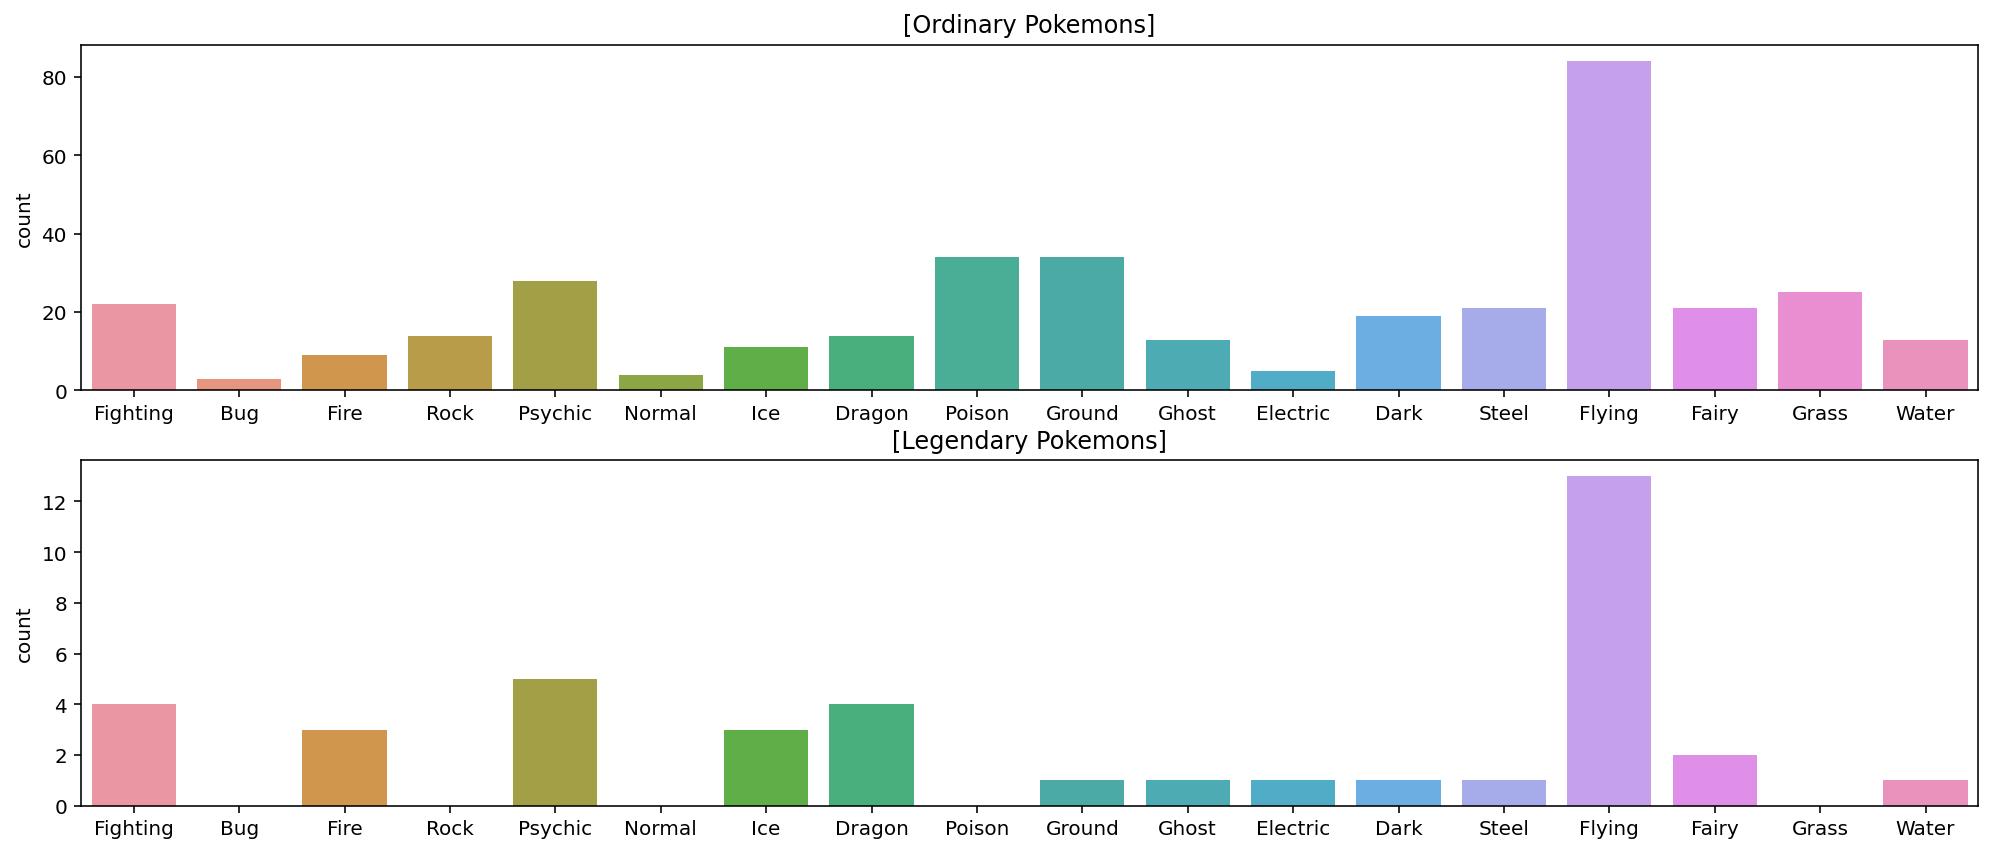

In [ ]:
# 일반 포켓몬과 전설의 포켓몬 Type 2 데이터 분포 확인
plt.figure(figsize=(17, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

**Q. Type 2 별로 Legendary의 비율을 보여주는 피벗 테이블 확인하기**

In [ ]:
# Type 2 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


### 1-8. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (4) 모든 스탯의 총합

**`Total` : 모든 스탯의 총합**

데이터셋에서 포켓몬은 총 6가지의 스탯 값을 가지며, 포켓몬 데이터의 Total 컬럼은 이 6가지 속성값의 총합.

In [ ]:
# 모든 스탯의 종류를 stats 라는 변수에 저장하기
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
# 첫 번째 포켓몬에 대한 검증을 통해 6개 스탯의 총합과 데이터에 제공된 Total 값이 맞는지 확인하기
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


**Q. `pokemon['Total'].values`와 `pokemon[stats].values`의 총 합이 같은 포켓몬의 수를 확인해봅시다.**

In [ ]:
# 'pokemon['Total'].values'와 'pokemon[stats].values의 총합'이 같은 포켓몬의 수 확인
pokemon["Total"] = pokemon[stats].sum(axis=1)

matches = (pokemon["Total"] == pokemon["Total"])
pokemon["Result"] = "Total value matches the sum of stats"
pokemon.loc[~matches, "Result"] = "Total value does not match the sum of stats"

print(pokemon[["Name", "Total", "Result"]])


                      Name  Total                                Result
0                Bulbasaur    318  Total value matches the sum of stats
1                  Ivysaur    405  Total value matches the sum of stats
2                 Venusaur    525  Total value matches the sum of stats
3    VenusaurMega Venusaur    625  Total value matches the sum of stats
4               Charmander    309  Total value matches the sum of stats
..                     ...    ...                                   ...
795                Diancie    600  Total value matches the sum of stats
796    DiancieMega Diancie    700  Total value matches the sum of stats
797    HoopaHoopa Confined    600  Total value matches the sum of stats
798     HoopaHoopa Unbound    680  Total value matches the sum of stats
799              Volcanion    600  Total value matches the sum of stats

[800 rows x 3 columns]


**`Total` 값에 따른 분포 plot**

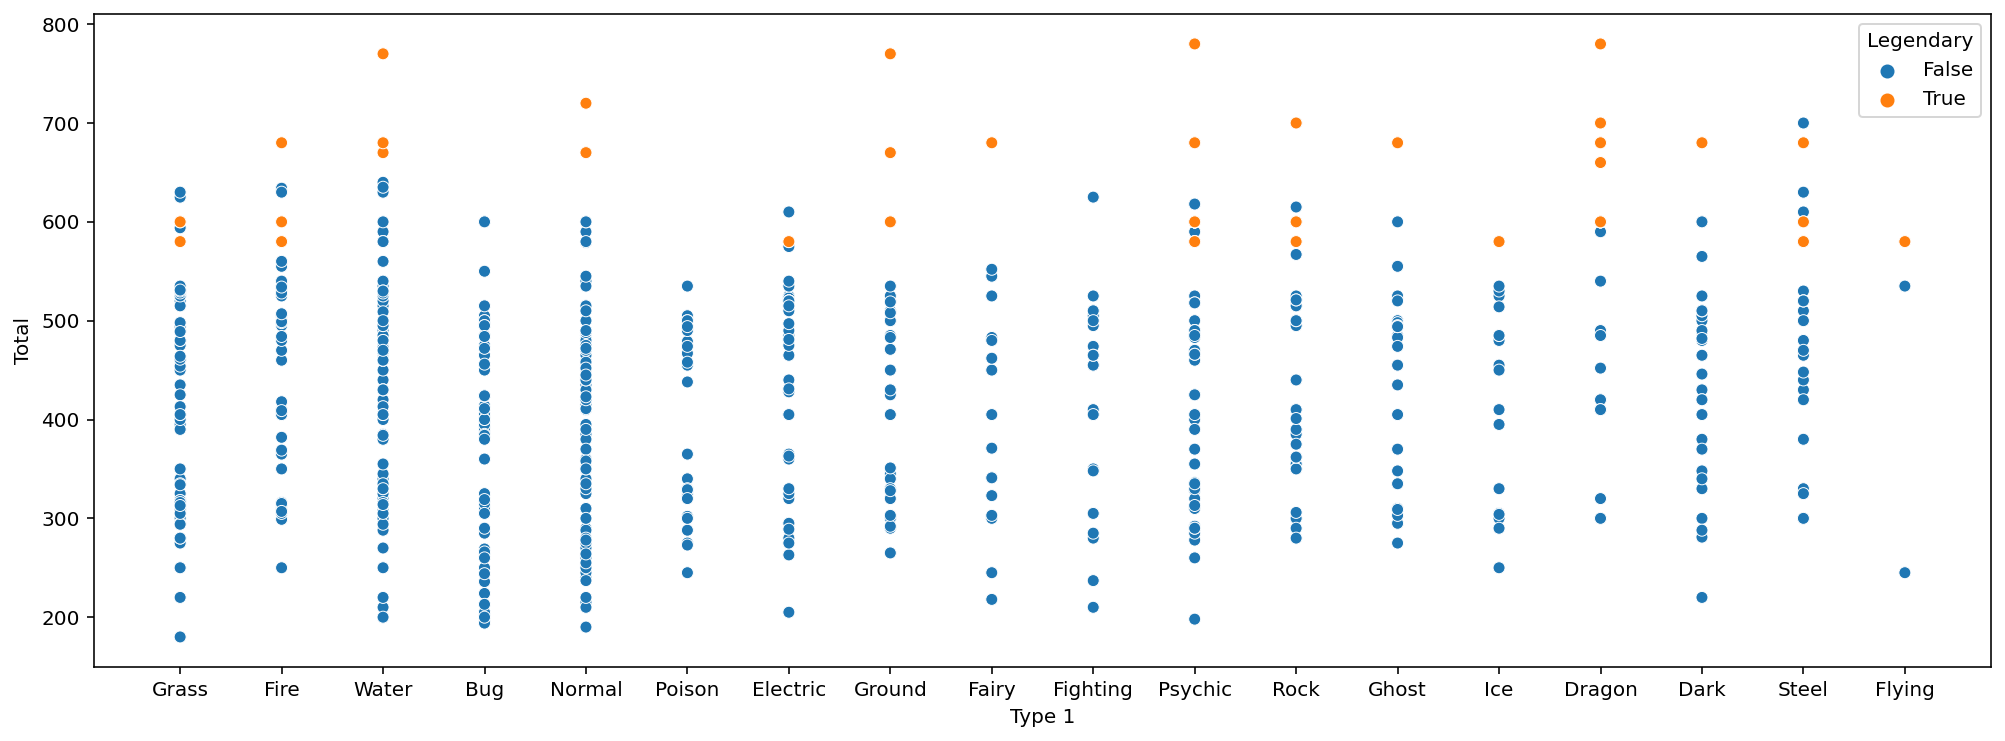

In [ ]:
# Total 값과 Legendary 여부에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(17, 6)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

`Type 1` 별로 `Total` 값을 확인했을 때, 전설의 포켓몬은 주로 Total 스탯 값이 높다. = 전설의 포켓몬이 쎄다

### 1-9. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (5) 세부 스탯

**전설의 포켓몬 세부 스탯: `HP` / `Attack` / `Defense` / `Sp. Atk` / `Sp. Def` / `Speed`**

**Q. 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현하기**

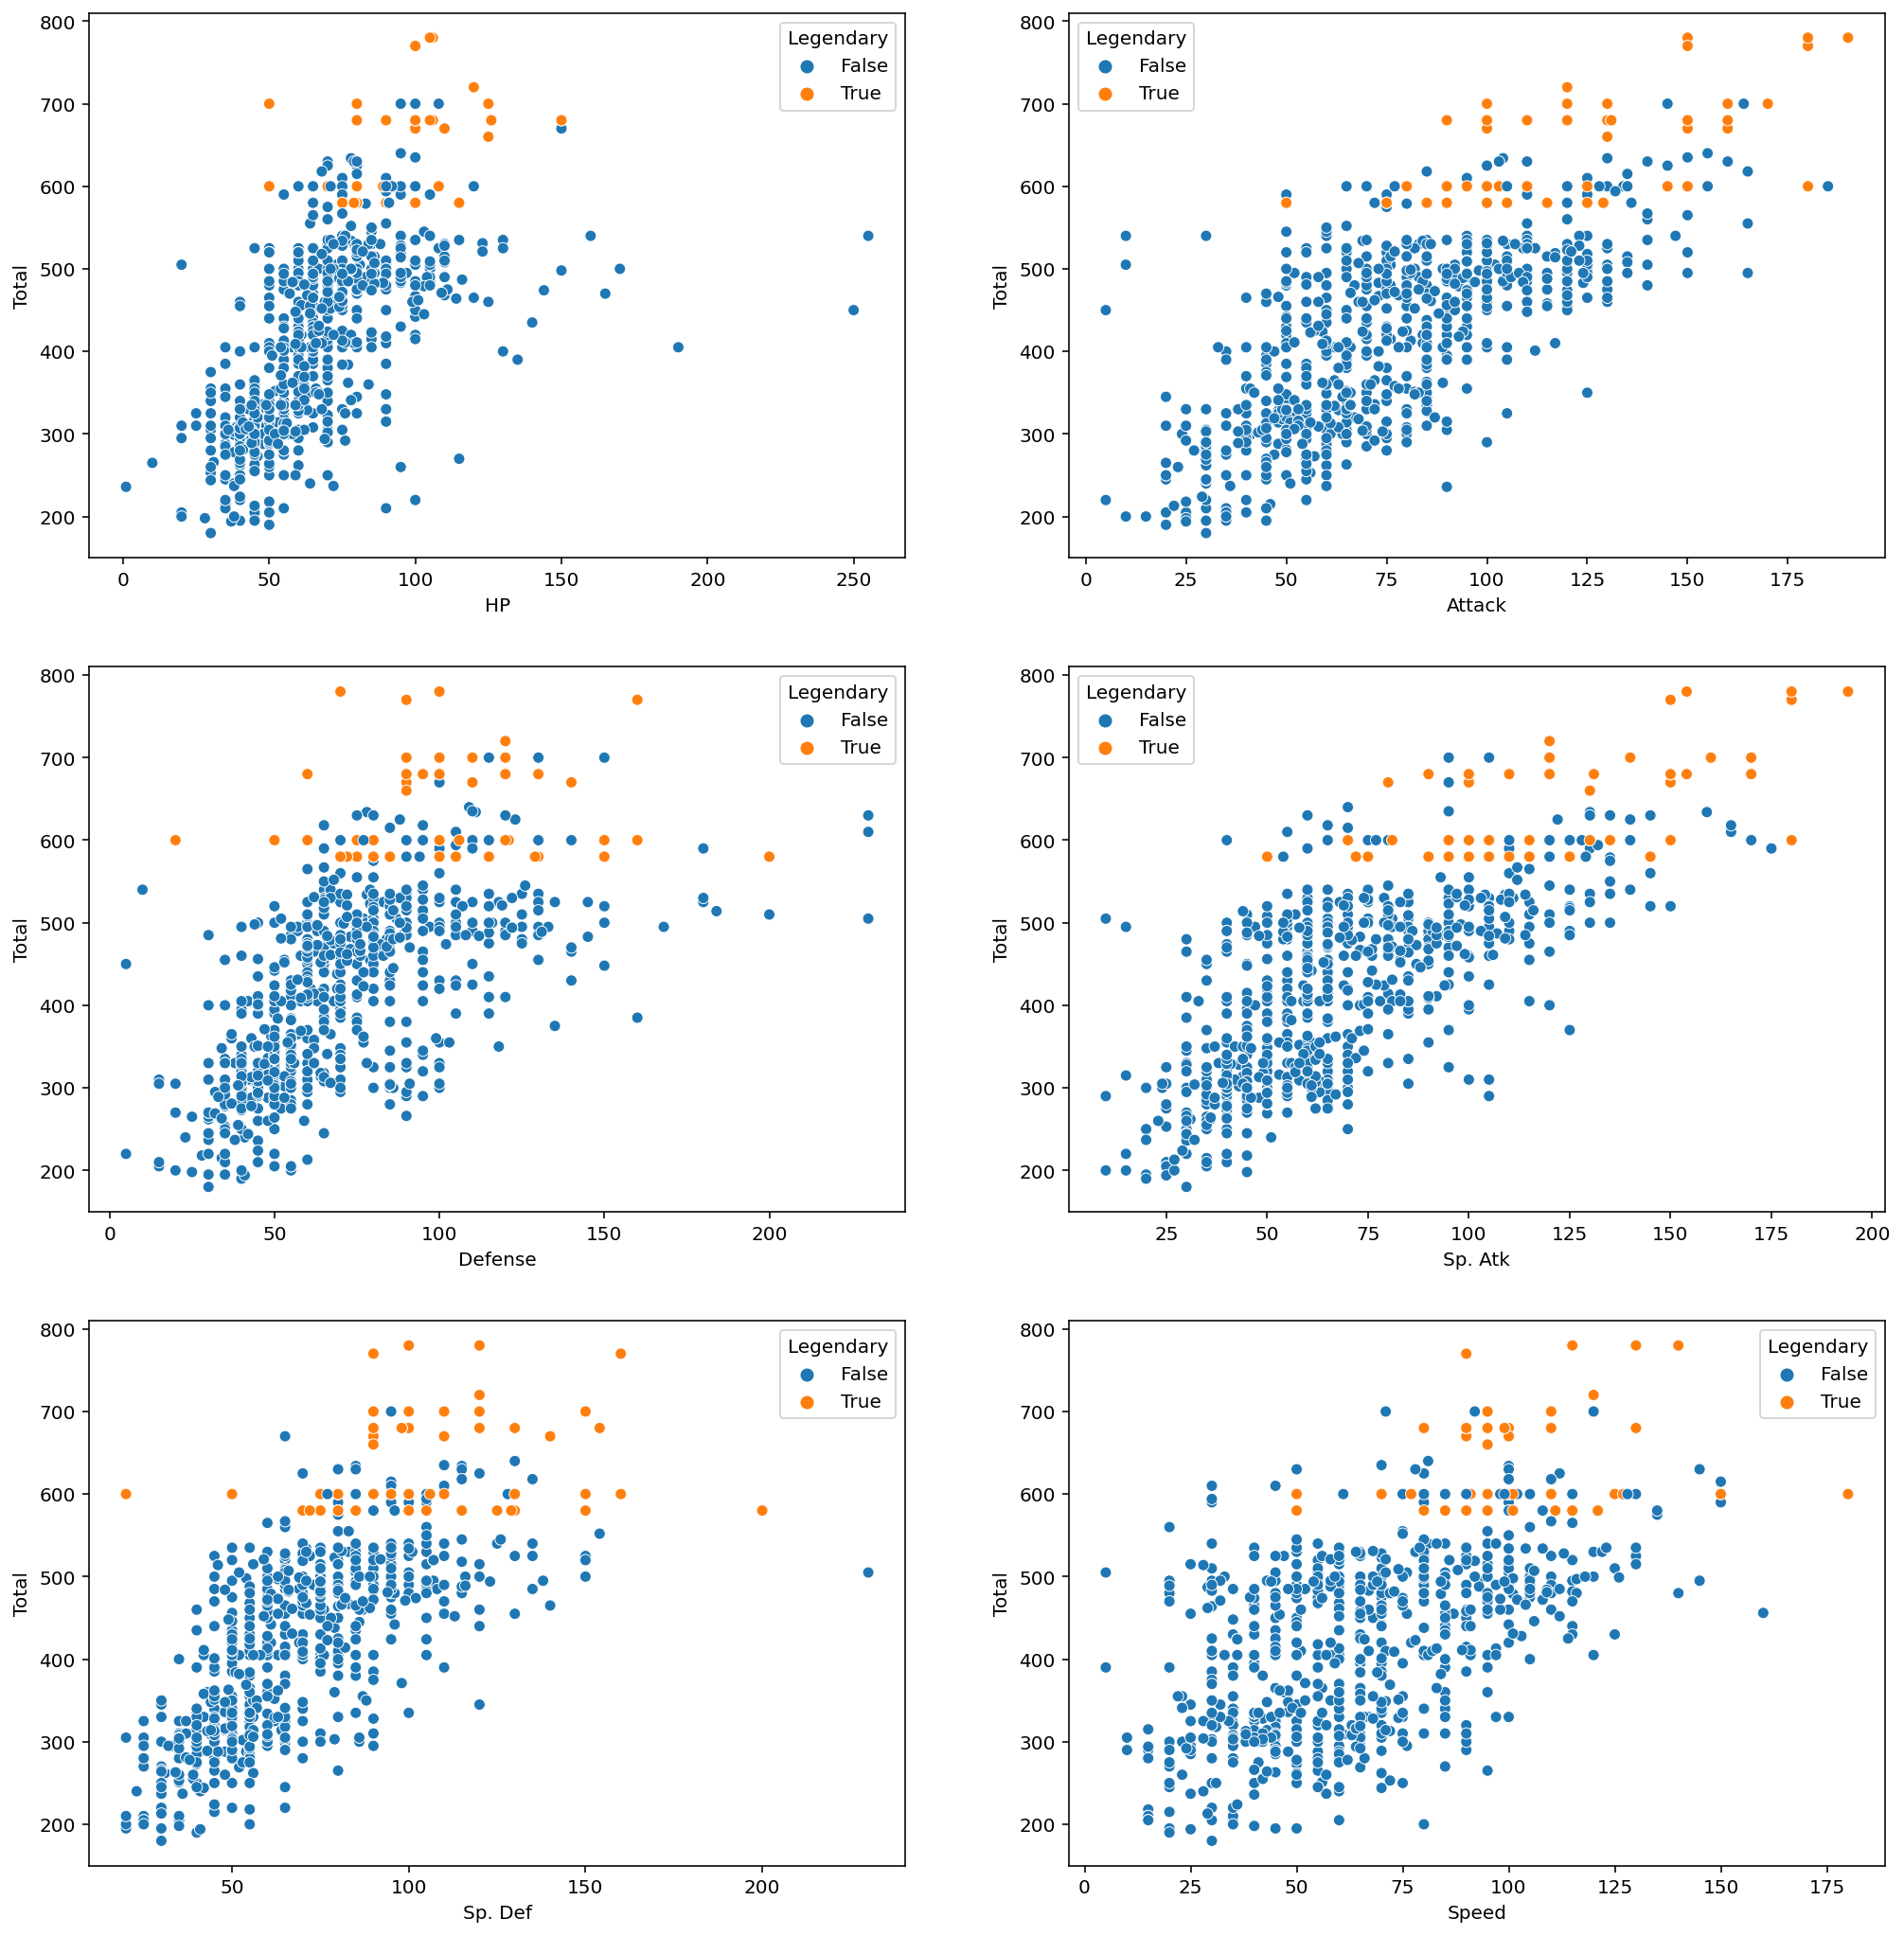

In [ ]:
# Q. 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현하기
# subplot을 생성하기
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6) ) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(17, 18)

# 스탯 정의하기
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

# 각 스탯에 대한 scatter plot을 생성하기
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for i, stat in enumerate(stats):
    sns.scatterplot(data=pokemon, y="Total", x=stat, hue="Legendary", ax=axes[i])

plt.show()

**각 스탯에 대한 분석**

**`HP` / `Defense` / `Sp. Def`**  
전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있습니다.  
그러나 그 포켓몬들도 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보입니다. (ex. 방어형, 공격형 등)  

**`Attack` / `Sp. Atk` / `Speed`**  
이 세 가지 스탯은 Total과 거의 비례하며, 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

### 1-10. 전설의 포켓몬? 먼저 샅샅이 살펴보자! (6) 세대

**`Generation` : 포켓몬의 세대**

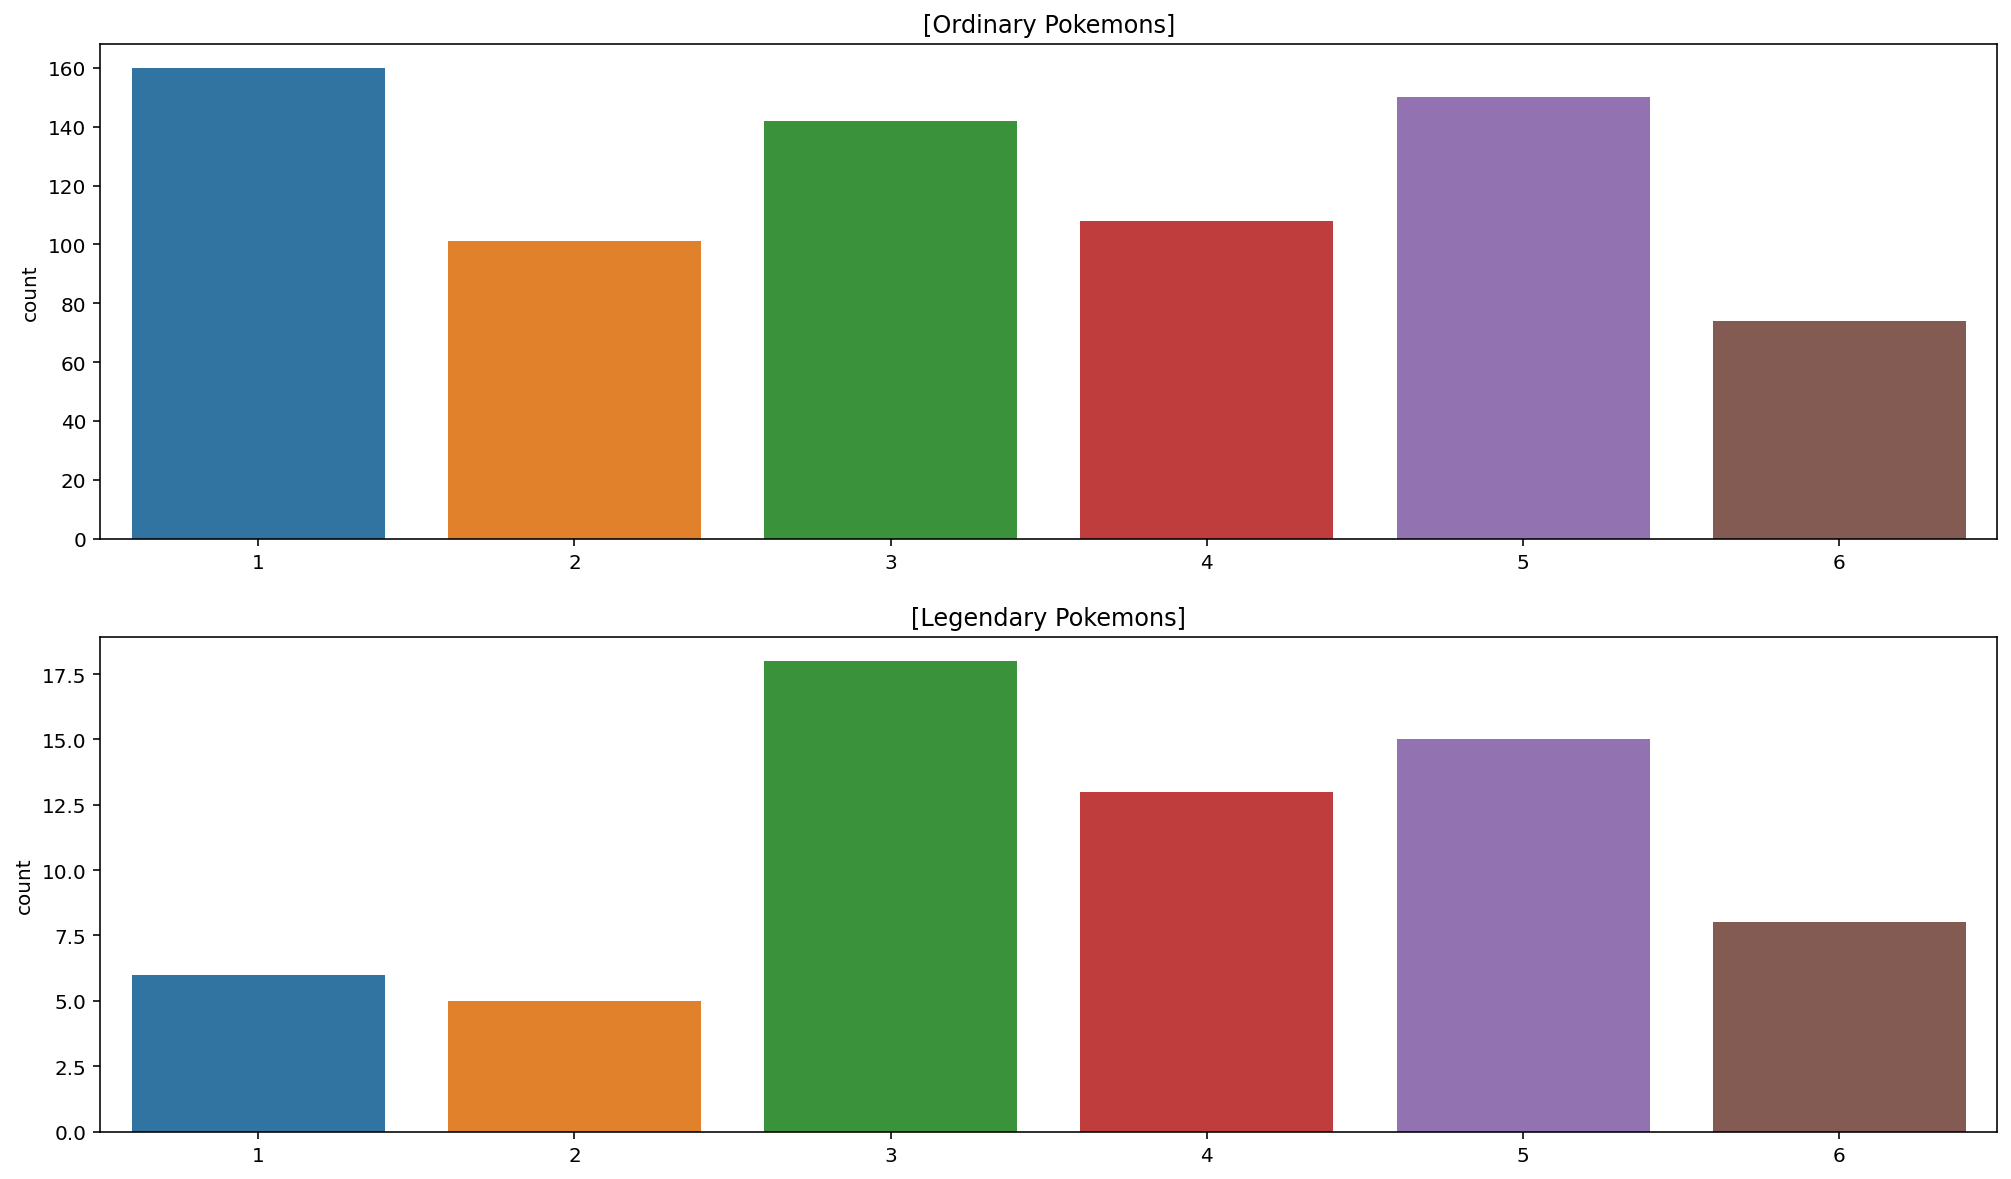

In [ ]:
# 각 세대에 대한 포켓몬의 수 확인하기
plt.figure(figsize=(17, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

### 1-11. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (1) Total 값

**전설의 포켓몬의 `Total` 값**

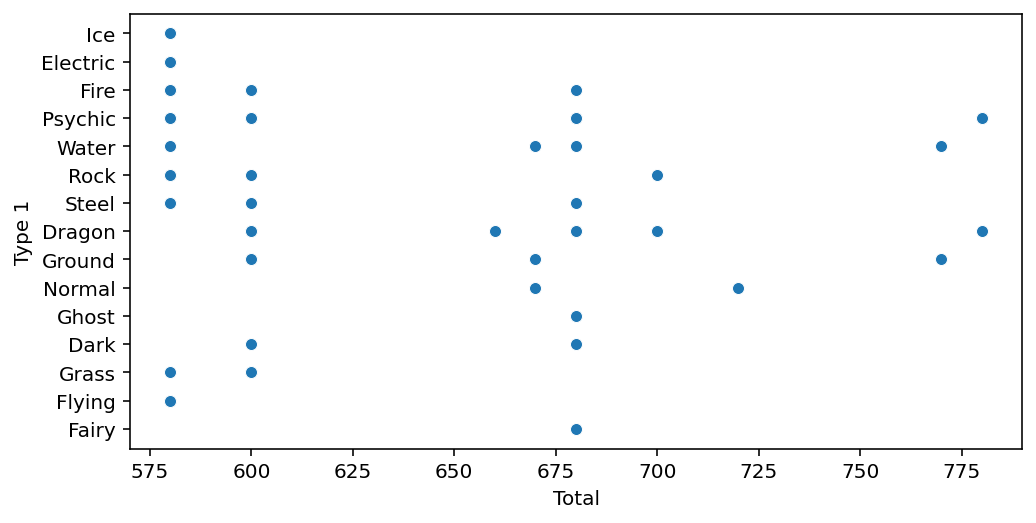

In [ ]:
# 전설의 포켓몬들의 Total 값을 Type 1 속성 별로 확인하기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

전설의 포켓몬들의 Total 값들이 600과 같은 특정한 값에 몰려있다?

In [ ]:
# 실제 전설의 포켓몬들이 가지는 Total 값들의 집합 확인하기
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


전설의 포켓몬들이 가지는 Total 값은 실제로 단 9가지 값 밖에 존재하지 않아요.  
그렇다면 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수 그래프로 확인해 봅시다.  

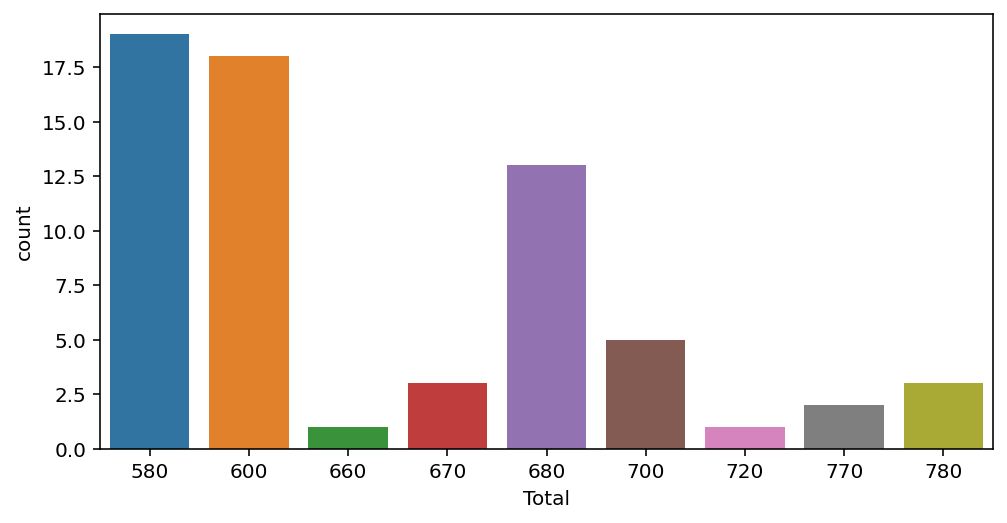

In [ ]:
# 전설의 포켓몬이 가지는 각 Total 값에 대한 포켓몬 수 그래프로 확인하기
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [ ]:
round(65 / 9, 2)

7.22

총 65마리의 전설의 포켓몬이 9개의 Total 값만 가진다는 것은 약 7.22마리 끼리는 같은 Total 스탯 값을 가집니다.

**Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.**

In [ ]:
# Q. ordinary 포켓몬의 'Total' 값 집합을 확인해봅시다.
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


**Q. 이 집합의 크기(길이)를 확인해봅시다.**

In [ ]:
# Q. 이 집합의 크기(길이)를 확인해봅시다.
print(len(sorted(list(set(ordinary["Total"])))))

195


In [ ]:
round(735 / 195, 2)

3.77

일반 포켓몬은 총 195가지의 Total 속성값을 가지고 전체 일반 포켓몬은(800 - 65)은 735마리이므로, 약 3.77마리만 같은 Total 스탯 값을 가집니다.

`Total` 값의 다양성은 일반 포켓몬이 전설의 포켓몬보다 두 배 가까이 됩니다. 즉 전설의 포켓몬의 Total값은 다양하지 않습니다.  
: 한 포켓몬의 `Total` 속성값이 전설의 포켓몬의 값들 집합에 포함되는지의 여부는 전설의 포켓몬임을 결정하는 데에 영향을 미칩니다.  

또한, 전설의 포켓몬의 `Total` 값 중에는 일반 포켓몬이 가지지 못하는 `Total` 값이 존재합니다. ex) 680, 720, 770, 780  
: `Total` 값은 전설의 포켓몬인지 아닌지를 결정하는 데에 이러한 방식으로도 영향을 미칠 수 있습니다.  

즉, `Total` 값은 포켓몬이 `legendary` 인지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있습니다.

### 1-12. 전설의 포켓몬과 일반 포켓몬, 그 차이는? (2) 이름

**특정 단어가 들어가 있는 이름**

In [ ]:
# 비슷한 이름을 가진 포켓몬들의 모임을 pd.concat 으로 합치기
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [ ]:
# 이름에 forme가 들어가는 여러 가지 전설의 포켓몬
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


`legendary`와 `ordinary` 각각에 모두 `"name_count"` 라는 이름의 길이를 나타내는 컬럼을 만들어줍니다.  
파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 `"name_count"` 칼럼에 넣어 봅시다.

In [ ]:
# lambda 기능을 사용해 행마다 legendary 포켓몬들의 이름의 길이를 구하고, 이를 "name_count" 칼럼으로 저장하기
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


**Q. ordinary 포켓몬의 데이터에도 'name_count' 값을 추가해줍시다.**

In [ ]:
# lambda 기능을 사용해 행마다 ordinary 포켓몬들의 이름의 길이를 구하고, 이를 "name_count" 칼럼으로 저장하기
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


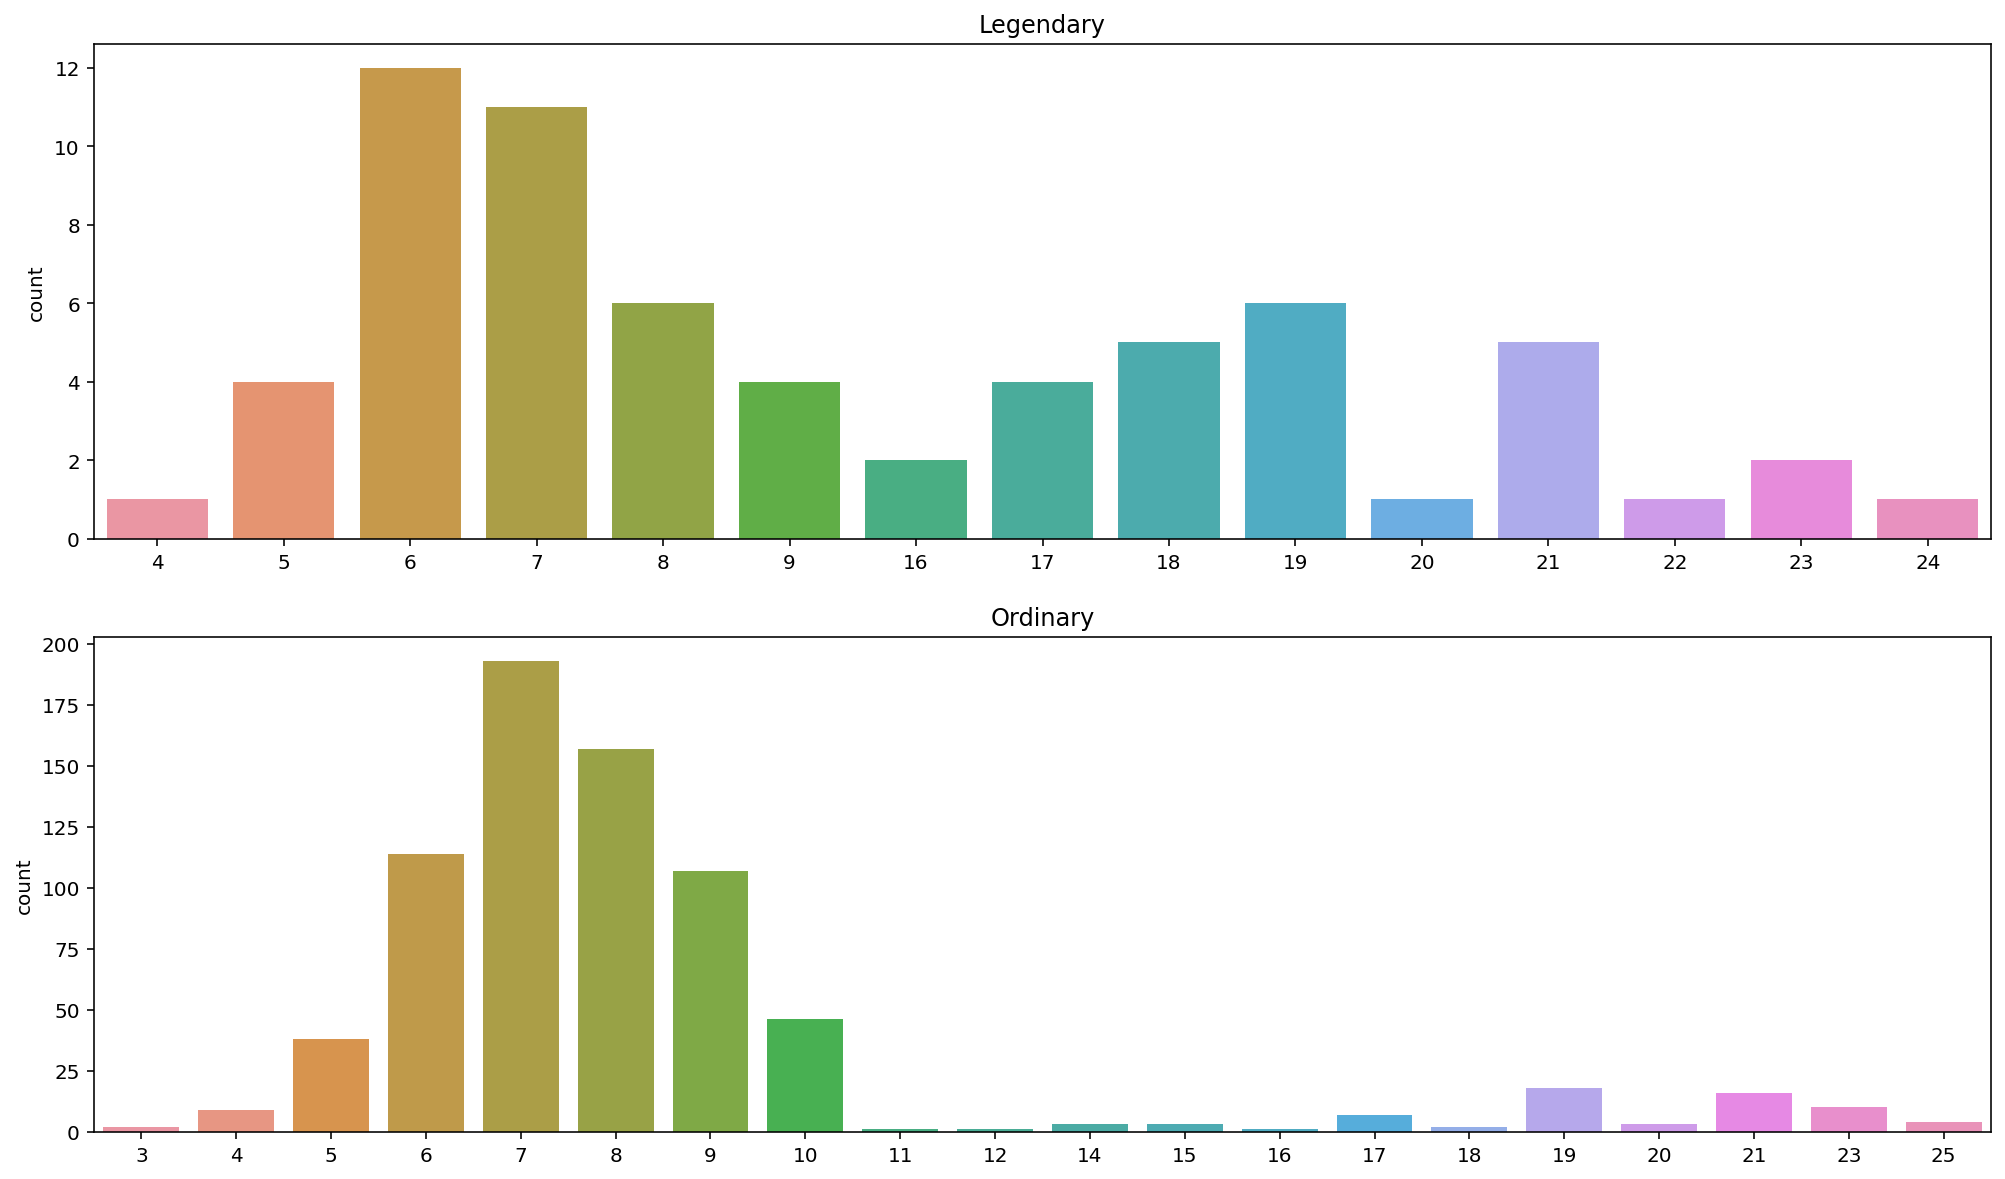

In [ ]:
# legendary와 ordinary 포켓몬의 name_count 컬럼 특징 확인하기
plt.figure(figsize=(17, 10))
plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

전설의 포켓몬은 16 이상의 긴 이름을 가진 포켓몬이 많은 반면, 일반 포켓몬은 10 이상의 길이를 가지는 이름의 빈도가 아주 낮습니다.  

In [ ]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


**Q. 일반 포켓몬의 이름이 10글자 이상일 확률을 구해보세요.**

In [ ]:
# 전설의 포켓몬의 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


만약 "Latios"가 전설의 포켓몬이라면, "%%% Latios" 또한 전설의 포켓몬이며, 적어도 전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재합니다.  
위의 분석을 통해 전설의 포켓몬은 긴 이름을 가졌을 확률이 높다는 것을 알 수 있습니다.

### 1-13. 모델에 넣기 위해! 데이터 전처리하기 (1) 이름의 길이가 10 이상인가?

이름에 관해서는 아래의 두 가지를 중점으로 처리하겠습니다.  

1. 이름의 길이: `name_count` 컬럼을 생성 후, 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성.
2. 토큰 추출: `legendary` 포켓몬에서 많이 등장하는 토큰을 추려내고, 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리.

**(1) 이름의 길이가 10 이상인가 아닌가**

In [ ]:
# 전체 데이터가 있는 pokemon 데이터 프레임에 이름의 길이를 확인할 수 있는 name_count 컬럼 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Total value matches the sum of stats,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Total value matches the sum of stats,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Total value matches the sum of stats,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Total value matches the sum of stats,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Total value matches the sum of stats,10


In [ ]:
# 이름의 길이가 10 이상이면 True, 미만이면 False를 가지는 long_name 컬럼 생성
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Total value matches the sum of stats,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Total value matches the sum of stats,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Total value matches the sum of stats,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Total value matches the sum of stats,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Total value matches the sum of stats,10,True


### 1-14. 모델에 넣기 위해! 데이터 전처리하기 (2) 이름에 자주 쓰이는 토큰 추출

전설의 포켓몬 이름에 가장 많이 쓰이는 토큰을 알아보고 이에 대한 새로운 컬럼을 만들어 봅시다.  
토큰을 추출하기에 앞서, 포켓몬의 이름에 대해 먼저 알아보겠습니다. 포켓몬의 이름은 총 네 가지 타입으로 나뉩니다.  

1. 한 단어인 경우 ex. `Venusaur`  
2. 두 단어이고, 앞 단어는 두 개의 대문자를 가지며 대문자를 기준으로 두 부분으로 나뉘는 경우 ex. `VenusaurMega Venusaur`
3. 이름은 두 단어이고, 맨 뒤에 X, Y로 성별을 표시하는 경우 ex. `CharizardMega Charizard X`  
4. 알파벳이 아닌 문자를 포함하는 경우 ex. `Zygarde50% Forme`

**이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기**

In [ ]:
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Total value matches the sum of stats,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Total value matches the sum of stats,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Total value matches the sum of stats,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Total value matches the sum of stats,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Total value matches the sum of stats,9,False,Volcanion


In [ ]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Total value matches the sum of stats,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Total value matches the sum of stats,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Total value matches the sum of stats,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Total value matches the sum of stats,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Total value matches the sum of stats,10,True,Charmander,True


In [ ]:
# 알파벳이 아닌 다른 문자가 이름에 포함 되었는지 여부 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 18)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,Total value matches the sum of stats,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,Total value matches the sum of stats,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,Total value matches the sum of stats,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Total value matches the sum of stats,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,Total value matches the sum of stats,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Total value matches the sum of stats,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,Total value matches the sum of stats,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,Total value matches the sum of stats,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Total value matches the sum of stats,16,True,Zygarde50%Forme,False


알파벳이 아닌 다른 문자가 이름에 포함 되어 있는 포켓몬은 9 마리 입니다. pandas의 replace 함수를 사용하여 포켓몬의 이름을 바꾸겠습니다.

In [ ]:
# 알파벳이 아닌 다른 문자가 이름에 포함 되어 있는 포켓몬 9 마리의 이름 바꾸기
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,Total value matches the sum of stats,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,Total value matches the sum of stats,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,Total value matches the sum of stats,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Total value matches the sum of stats,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,Total value matches the sum of stats,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Total value matches the sum of stats,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,Total value matches the sum of stats,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,Total value matches the sum of stats,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Total value matches the sum of stats,16,True,Zygarde50%Forme,False


**Q. 바꿔준 'Name' 컬럼으로 'Name_nospace'를 만들고, 다시 isalpha()로 체크해봅시다.**

In [ ]:
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,Total value matches the sum of stats,7,False,Diancie,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Total value matches the sum of stats,19,True,DiancieMegaDiancie,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,Total value matches the sum of stats,19,True,HoopaHoopaConfined,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,Total value matches the sum of stats,18,True,HoopaHoopaUnbound,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,Total value matches the sum of stats,9,False,Volcanion,True


In [ ]:
# isalpha() 함수를 이용해 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Total value matches the sum of stats,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Total value matches the sum of stats,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Total value matches the sum of stats,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Total value matches the sum of stats,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Total value matches the sum of stats,10,True,Charmander,True


In [ ]:
# 알파벳이 아닌 다른 문자가 이름에 포함되었는지 여부 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 18)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Result,name_count,long_name,Name_nospace,name_isalpha


**이름을 띄어쓰기 & 대문자 기준으로 분리해 토큰화하기**

In [ ]:
# Regex Lib
import re

In [ ]:
# 예제 이름
name = "CharizardMega Charizard X"

In [ ]:
# 공백을 기준으로 예제 이름 분리하기
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [ ]:
# CharizardMega를 Charizard와 Mega로 나누기
# CharizardMega를 temp로 저장하기
temp = name_split[0]
temp

'CharizardMega'

In [ ]:
# CharizardMega를 대문자로 시작해서 소문자로 끝나는 토큰들로 분리
# re의 findall 함수 이용
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [ ]:
# 이름을 이루고 있는 모든 토큰들을 tokens에 저장하기
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

**Q. 토큰화 과정을 모든 이름에 적용시킬 수 있도록 함수를 만들어서 전체 데이터셋에 적용하기**

In [ ]:
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [ ]:
# 전설의 포켓몬 이름에 사용된 토큰들 모으기
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [ ]:
# collections 모듈에 있는 Counter 가져오기
from collections import Counter

In [ ]:
# Counter 객체는 다음과 같이 각 요소가 몇 개인지를 담은 튜플 리스트 반환하기
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [ ]:
# most_common을 활용하면 가장 많은 요소와 등장 횟수가 무엇인지 정렬하기
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [ ]:
# token_set에는 어떤 토큰이 가장 많이 쓰였는지 찾기
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

전설의 포켓몬 이름에 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼을 만들겠습니다.  
`Pandas`에서 문자열 데이터셋에 특정 구문이 포함되어 있는지 여부는 `str.contains` 함수로 간단히 확인할 수 있습니다.

In [ ]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### 1-15. 모델에 넣기 위해! 데이터 전처리하기 (3) Type1 & 2! 범주형 데이터 전처리하기

다음과 같은 규칙으로 범주형 데이터를 전처리 하겠습니다.  

* 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding) 합니다.  
* 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.  

In [ ]:
# EDA 단계에서 만들었던 모든 Type의 리스트 다시 가져오기
print(types)

['Fighting', 'Bug', 'Fire', 'Rock', 'Psychic', 'Normal', 'Ice', 'Dragon', 'Poison', 'Ground', 'Ghost', 'Electric', 'Dark', 'Steel', 'Flying', 'Fairy', 'Grass', 'Water']


In [ ]:
# 위의 18개 Type 컬럼에 대해 원-핫 인코딩하기
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Fighting,Bug,Fire,Rock,Psychic,Normal,Ice,Dragon,Poison,Ground,Ghost,Electric,Dark,Steel,Flying,Fairy,Grass,Water
0,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,Grass,Poison,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,Fire,NaN,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 1-16. 가랏, 몬스터볼! (1) 가장 기본 데이터로 만드는 베이스라인

**가장 기본 데이터로 만드는 베이스라인(Baseline)**

In [ ]:
# 원본 데이터 가져오기
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 원본 데이터의 컬럼 확인하기
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
# #, Name, Type 1, Type 2, Legendary 제외하기
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [ ]:
# target 변수에 Legendary 데이터 저장하기
target = 'Legendary'

**Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.**

In [ ]:
# 변수 'X'에 features 컬럼에 해당하는 데이터 저장하기
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


**Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.**

In [ ]:
# 변수 'y'에 target 컬럼에 해당하는 데이터 저장하기
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

훈련 데이터와 학습 데이터로 분리하겠습니다. 모델을 학습시킨 후 그 성능을 평가하기 위해서는 학습 데이터와 테스트 데이터가 분리되어 있어야 합니다.  
데이터 분리에는 `sklearn.model_selection` 모듈 안의 `train_test_split` 함수를 사용합니다.

In [ ]:
# 훈련 데이터와 학습 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 1-17. 가랏, 몬스터볼! (2) 의사 결정 트리 모델 학습시키기

**의사 결정 트리(decision tree)**

In [ ]:
# 의사 결정 트리(decision tree) Lib
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [ ]:
# 의사 결정 트리(decision tree) 모델 정의하기
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
# 모델을 훈련 데이터로 학습시키고, 학습 데이터 예측하기
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

위 값은 왼쪽 위부터 순서대로 `TN` / `FP` / `FN` / `TP` 를 나타냅니다.  
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.  
위 수치를 해석해 보면 다음과 같습니다.  

* `TN` (True Negative): 옳게 판단한 Negative, 즉 일반 포켓몬을 일반 포켓몬이라고 알맞게 판단한 경우입니다.  
* `FP` (False Positive): 틀리게 판단한 Positive, 즉 일반 포켓몬을 전설의 포켓몬이라고 잘못 판단한 경우입니다.  
* `FN` (False Negative): 틀리게 판단한 Negative, 즉 전설의 포켓몬을 일반 포켓몬이라고 잘못 판단한 경우입니다.  
* `TP` (True Positive): 옳게 판단한 Positive, 즉 전설의 포켓몬을 전설의 포켓몬이라고 알맞게 판단한 경우입니다.  

**Q. 위에서 나타난 confusion_matrix 값들로 정확도(accuracy)를 구할 수 있을까요?**

In [ ]:
# 152 / 160 * 100 = 95%

In [ ]:
# 전체 데이터 중 전설의 포켓몬
len(legendary)

65

In [ ]:
# 정확도 외 다른 척도로 모델의 성능 평가하기 - classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



`recall` 값이 0.62로 꽤나 낮습니다.  
Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.  

### 1-18. 가랏, 몬스터볼! (3) 피쳐 엔지니어링 데이터로 학습시키면 얼마나 차이가 날까?

In [ ]:
# 전체 데이터 컬럼 확인하기
print(len(pokemon.columns))
print(pokemon.columns)

46
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Result',
       'name_count', 'long_name', 'Name_nospace', 'name_isalpha', 'Forme',
       'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios',
       'Kyogre', 'Groudon', 'Fighting', 'Bug', 'Fire', 'Rock', 'Psychic',
       'Normal', 'Ice', 'Dragon', 'Poison', 'Ground', 'Ghost', 'Electric',
       'Dark', 'Steel', 'Flying', 'Fairy', 'Grass', 'Water'],
      dtype='object')


몇 가지 컬럼을 제외하고 모델 학습에 사용할 컬럼들만 추려서 `features` 라는 변수에 저장하겠습니다.  
이 `features`는 모델을 학습시키면서 입력값으로 사용될 특징들을 포함합니다.

In [ ]:
# 변수 features에 모델 학습에 사용할 컬럼들 저장하기
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [ ]:
# 변수 target에 Legendary 저장하기
target = "Legendary"
target

'Legendary'

**Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.**

In [ ]:
# Q. 변수 'X'에 feature에 해당하는 데이터 저장하기
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


**Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.**

In [ ]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
# X_train부터 y_test까지 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


### 1-19. 가랏, 몬스터볼! (4) 의사 결정 트리 모델 다시 학습시키기

### 의사 결정 트리(decision tree)
**의사 결정 트리(decision tree)를 활용해서 모델을 다시 학습시킨 후, 결과 비교하기**

In [ ]:
# 의사 결정 트리(decision tree) 모델 정의하기
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

**Q. train 데이터로 decision tree 모델을 학습시키고, test 데이터로 모델의 예측 값 구하기**

In [ ]:
# train 데이터로 의사 결정 트리(decision tree) 모델을 학습시키고, test 데이터로 모델의 예측 값 구하기
model.fit(X_train, y_train)
pred=model.predict(X_test)
pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,

**Q. confusion matrix를 확인해보세요.**

In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[141   6]
 [  1  12]]


**Q. classification report도 확인해봅시다.**

In [ ]:
cls_report = classification_report(y_test, pred)
print(cls_report)

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



위에서 약 0.62에 그쳤던 `recall` 값이 무려 0.92로까지 올랐습니다.

### 램덤 포레스트(Random Forest)
**램덤 포레스트(Random Forest)를 활용해서 모델을 다시 학습시킨 후, 결과 비교하기**

In [ ]:
# 램덤 포레스트(Random Forest) 모델 정의하기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=25)

In [ ]:
# train 데이터로 램덤 포레스트(Random Forest) 모델을 학습시키고, test 데이터로 모델의 예측 값 구하기
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,

In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[143   4]
 [  3  10]]


In [ ]:
# classification report 확인하기
cls_report = classification_report(y_test, pred)
print(cls_report)

              precision    recall  f1-score   support

       False       0.98      0.97      0.98       147
        True       0.71      0.77      0.74        13

    accuracy                           0.96       160
   macro avg       0.85      0.87      0.86       160
weighted avg       0.96      0.96      0.96       160



### XGBoost
**XGBoost(Extreme Gradient Boosting)를 활용해서 모델을 다시 학습시킨 후, 결과 비교하기**

In [ ]:
# XGBoost 모델 정의하기
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
model = XGBClassifier(random_state=25, eval_metric='logloss')

In [ ]:
# train 데이터로 XGBoost 모델을 학습시키고, test 데이터로 모델의 예측 값 구하기
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,

In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[144   3]
 [  0  13]]


In [ ]:
# classification report 확인하기
cls_report = classification_report(y_test, pred)
print(cls_report)

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       147
        True       0.81      1.00      0.90        13

    accuracy                           0.98       160
   macro avg       0.91      0.99      0.94       160
weighted avg       0.98      0.98      0.98       160



### 교차 검증(Cross Validation)
**교차 검증(Cross Validation)을 활용해서 모델을 다시 학습시킨 후, 결과 비교하기**

**KFold**

In [ ]:
# KFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=25)

kfold = KFold(n_splits=5)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True False]
[False False  True  True 

In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[132   6]
 [  3  19]]


In [ ]:
# classification report 확인하기
cls_report = classification_report(y_test, pred)
print(cls_report)

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       138
        True       0.76      0.86      0.81        22

    accuracy                           0.94       160
   macro avg       0.87      0.91      0.89       160
weighted avg       0.95      0.94      0.95       160



**Stratified KFold**

In [ ]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold
model = DecisionTreeClassifier(random_state=25)

kfold = StratifiedKFold(n_splits=5)
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(pred)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False False
 False False  True  True]
[False False False False 

In [ ]:
# sklearn.metrics의 confusion_matrix로 결과 확인
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[142   5]
 [  3  10]]


In [ ]:
# classification report 확인하기
cls_report = classification_report(y_test, pred)
print(cls_report)

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       147
        True       0.67      0.77      0.71        13

    accuracy                           0.95       160
   macro avg       0.82      0.87      0.84       160
weighted avg       0.95      0.95      0.95       160



### 1-20. 마무리

1. **포켓몬, 그 데이터는 어디서 구할까?** 캐글 웹사이트에서 원하는 데이터를 가져와서 준비하기  
2. **전설의 포켓몬? 먼저 샅샅이 살펴보자!** 전체 데이터셋 탐색  
3. **전설의 포켓몬과 일반 포켓몬, 그 차이는?** target의 특징 살펴보기  
4. **모델에 넣기 위해! 데이터 전처리하기** 데이터 전처리  
5. **가랏, 몬스터볼!** 베이스라인 모델을 학습시키고, 데이터 성능 올리기  

**Q. 중복된 데이터를 제외한 데이터의 크기를 구하는 방법은 무엇이었을까요?**

`pokemon["Name"]`을 집합(set)으로 만들어 준 후 길이(len)를 확인하면, 중복이 사라지면서 유일한 이름의 개수를 확인

**Q. Seaborn 라이브러리의 여러 가지 그래프 중에서, 다음을 표현할 때 사용했던 plot의 종류를 복습해봅시다.**

**① 포켓몬의 속성별로 몇 개의 데이터가 있는지 확인**  
plt의 subplot을 활용해서 두 개의 그래프를 한 번에 그리면서, 그래프는 sns(seaborn)의 `countplot`(데이터의 개수를 표시하는 플롯)을 활용

**② 각각의 스탯에 대해 전설 포켓몬과 일반 포켓몬 데이터 분포를 비교**  
각각의 스탯 값은 subplot으로 여러 그래프를 한 번에 확인, `scatterplot`으로 subplot으로 표현하기